In [1]:
# Start small and save your time.

In [2]:
# import necessary packages

import pandas as pd # for working with tables
pd.options.mode.chained_assignment = None  # default = 'warn'

import os # for finding file directory with os.getcwd()

# for calculations
import numpy as np 
import math

import matplotlib.pyplot as plt # for plotting

# for plotting histogram with percentages
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter

from PIL import Image # for converting plots to black-and-white
from IPython.display import HTML

from datetime import date

from ipynb.fs.full.MyFunctions_00 import *

In [3]:
print(timestamp())

06-03-23


In [4]:
# read in saved Pr tables
voids_pAGN = read_data_db('VOIDS_pAGN_' + '05-31-23') # timestamp())
walls_pAGN = read_data_db('WALLS_pAGN_' + '05-31-23') # timestamp())

read VOIDS_pAGN_05-31-23
read WALLS_pAGN_05-31-23


In [5]:
voids_parent = read_data_db('voids_parent_colors_new_' + '04-11-23') # timestamp())
walls_parent = read_data_db('walls_parent_colors_new_' + '04-11-23') # timestamp())

voids_bright = read_data_db('voids_bright_colors_new_' + '04-11-23') # timestamp())
walls_bright = read_data_db('walls_bright_colors_new_' + '04-11-23') # timestamp())

voids_main = read_data_db('voids_main_colors_new_' + '04-11-23') # timestamp())
walls_main = read_data_db('walls_main_colors_new_' + '04-11-23') # timestamp())

voids_dwarf = read_data_db('voids_dwarf_colors_new_' + '04-11-23') # timestamp())
walls_dwarf = read_data_db('walls_dwarf_colors_new_' + '04-11-23') # timestamp())

read voids_parent_colors_new_04-11-23
read walls_parent_colors_new_04-11-23
read voids_bright_colors_new_04-11-23
read walls_bright_colors_new_04-11-23
read voids_main_colors_new_04-11-23
read walls_main_colors_new_04-11-23
read voids_dwarf_colors_new_04-11-23
read walls_dwarf_colors_new_04-11-23


In [6]:
voids_parent_pAGN = merge_nona(voids_parent, voids_pAGN)
voids_bright_pAGN = merge_nona(voids_bright, voids_pAGN)
voids_main_pAGN = merge_nona(voids_main, voids_pAGN)
voids_dwarf_pAGN = merge_nona(voids_dwarf, voids_pAGN)

fraction lost = 0.0
fraction lost = 0.0
fraction lost = 0.0
fraction lost = 0.0


In [7]:
walls_parent_pAGN = merge_nona(walls_parent, walls_pAGN)
walls_bright_pAGN = merge_nona(walls_bright, walls_pAGN)
walls_main_pAGN = merge_nona(walls_main, walls_pAGN)
walls_dwarf_pAGN = merge_nona(walls_dwarf, walls_pAGN)

fraction lost = 0.0
fraction lost = 0.0
fraction lost = 0.0
fraction lost = 0.0


In [8]:
voids_dwarf_pAGN.head()

,object_tag,num_obj_x,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3,num_obj_y,percentAGN,error
0,3316.0,14.0,0.622897,1,160.686807,0.149171,274,558,51913,-16.790483,...,0.495,2.2,8.382,NaN,0.3,-0.031,2.337,14.0,7.143,7.394
1,3427.0,11.0,0.938481,1,162.199319,-0.346084,275,107,51910,-16.943888,...,NaN,1.8,8.341,0.276,3.9,0.188,2.651,11.0,0.000,0.000
2,6193.0,6.0,0.802837,1,173.602160,1.154284,282,451,51658,-16.402826,...,0.432,2.5,8.692,NaN,0.4,0.031,3.182,6.0,66.667,43.033
3,8167.0,8.0,0.358524,1,184.965445,0.810061,288,455,52000,-16.805676,...,0.272,4.0,8.647,NaN,-1.0,0.037,3.511,8.0,37.500,25.388
4,13967.0,24.0,0.499440,1,217.722962,0.462839,305,604,51613,-16.850922,...,0.047,22.9,6.637,0.059,18.5,0.647,4.148,24.0,20.833,10.242


In [9]:
walls_parent_pAGN[(walls_parent_pAGN['percentAGN'] == 100)]

,object_tag,num_obj_x,Pr,vflag,RA,DEC,PLATE,FIBERID,MJD,rabsmag_NSA,...,w3sigmpro,w3snr,w4mpro,w4sigmpro,w4snr,W1-W2,W2-W3,num_obj_y,percentAGN,error
29549,144712.0,24.0,-0.019614,0,123.819759,35.283013,826,266,52295,-20.087034,...,0.029,37.1,5.505,0.037,29.6,1.304,4.249,24.0,100.0,0.0
29782,145201.0,22.0,0.878231,0,129.941656,38.721941,828,155,52317,-18.391125,...,0.042,25.9,7.224,0.115,9.4,1.138,2.646,22.0,100.0,0.0
29928,145496.0,4.0,0.790130,0,129.989226,39.793695,829,294,52296,-17.623213,...,NaN,1.9,8.466,NaN,-0.6,0.144,3.778,4.0,100.0,0.0
29953,145542.0,22.0,0.968884,0,130.563728,40.425913,829,386,52296,-20.514404,...,0.015,74.1,3.469,0.024,44.8,1.267,2.996,22.0,100.0,0.0
30271,146521.0,5.0,0.006204,0,168.383374,4.891721,835,440,52326,-18.227463,...,0.373,2.9,8.578,NaN,0.8,0.364,3.106,5.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218442,685881.0,26.0,0.895243,0,237.506653,27.816799,1654,442,53498,-20.574759,...,0.016,65.9,4.570,0.022,49.3,1.241,3.090,26.0,100.0,0.0
218461,685928.0,10.0,-0.302551,0,238.185084,46.486212,0,0,0,-12.438223,...,0.083,13.1,8.362,0.188,5.8,0.916,3.749,10.0,100.0,0.0
218474,685973.0,25.0,0.259929,0,238.795855,27.015610,1654,593,53498,-19.755400,...,0.021,51.0,5.441,0.029,37.1,1.491,3.597,25.0,100.0,0.0
218637,686372.0,25.0,0.888055,0,241.700427,29.180074,0,0,0,-14.751274,...,0.038,28.3,7.117,0.092,11.8,0.953,2.491,25.0,100.0,0.0


In [10]:
walls_parent_pAGN_10 = walls_parent_pAGN[(walls_parent_pAGN['percentAGN'] > 10.0)]

voids_parent_pAGN_10 = voids_parent_pAGN[(voids_parent_pAGN['percentAGN'] > 10.0)]

In [14]:
np.linspace(0, 100, num = 11, endpoint = True)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

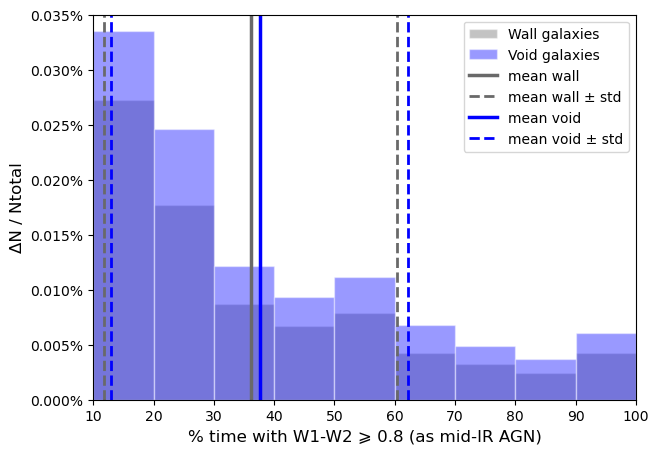

In [18]:
# plot distribution curve of Pearson coefficients of each object

fig, ax = plt.subplots(figsize = (7, 5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 3))

# filled bars

num_bins = 11

a = 0.4

ax.hist(walls_parent_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = True),
        color = "dimgray",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Wall galaxies',
        alpha = a,
        weights = np.ones_like(walls_parent_pAGN['percentAGN']) / len(walls_parent_pAGN['percentAGN'])
       ) 


ax.hist(voids_parent_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = True),
        color = "blue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Void galaxies',
        alpha = a,
        weights = np.ones_like(voids_parent_pAGN['percentAGN']) / len(voids_parent_pAGN['percentAGN'])
       ) 

ax.axvline(x = walls_parent_pAGN_10['percentAGN'].mean(), 
              color = 'dimgrey', 
              linewidth = 2.5, 
              label = 'mean wall')
ax.axvline(x = walls_parent_pAGN_10['percentAGN'].mean() + np.std(walls_parent_pAGN_10['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean wall ± std')
ax.axvline(x = walls_parent_pAGN_10['percentAGN'].mean() - np.std(walls_parent_pAGN_10['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2)

ax.axvline(x = voids_parent_pAGN_10['percentAGN'].mean(), 
              color = 'blue', 
              linewidth = 2.5, 
              label = 'mean void')
ax.axvline(x = voids_parent_pAGN_10['percentAGN'].mean() + np.std(voids_parent_pAGN_10['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
ax.axvline(x = voids_parent_pAGN_10['percentAGN'].mean() - np.std(voids_parent_pAGN_10['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2)

ax.set_ylabel('ΔN / Ntotal', size = 'large')
ax.set_xlabel('% time with W1-W2 ⩾ 0.8 (as mid-IR AGN)', size = 'large')
ax.legend(loc = 'best')

ax.set_xlim(10, 100)
ax.set_ylim(0, 0.035)

# ax.xaxis.set_ticks(np.arange(start = 0, stop = 100.1, step = 0.20))
# plt.rcParams.update({'font.size': 14})


fig.savefig('Figures/iPoster_10pAGN-dist_' + timestamp() + '.png', dpi = 600, bbox_inches = 'tight')
plt.show()

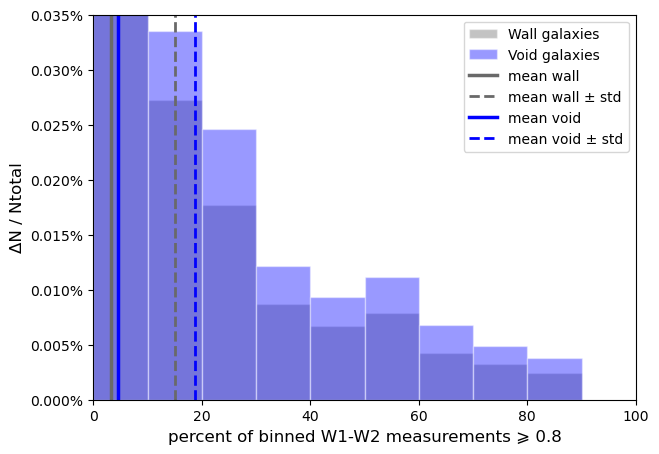

In [11]:
# plot distribution curve of Pearson coefficients of each object

fig, ax = plt.subplots(figsize = (7, 5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 3))

# filled bars

num_bins = 10

a = 0.4

ax.hist(walls_parent_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "dimgray",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Wall galaxies',
        alpha = a,
        weights = np.ones_like(walls_parent_pAGN['percentAGN']) / len(walls_parent_pAGN['percentAGN'])
       ) 


ax.hist(voids_parent_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "blue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Void galaxies',
        alpha = a,
        weights = np.ones_like(voids_parent_pAGN['percentAGN']) / len(voids_parent_pAGN['percentAGN'])
       ) 

ax.axvline(x = walls_parent_pAGN['percentAGN'].mean(), 
              color = 'dimgrey', 
              linewidth = 2.5, 
              label = 'mean wall')
ax.axvline(x = walls_parent_pAGN['percentAGN'].mean() + np.std(walls_parent_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean wall ± std')
ax.axvline(x = walls_parent_pAGN['percentAGN'].mean() - np.std(walls_parent_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2)

ax.axvline(x = voids_parent_pAGN['percentAGN'].mean(), 
              color = 'blue', 
              linewidth = 2.5, 
              label = 'mean void')
ax.axvline(x = voids_parent_pAGN['percentAGN'].mean() + np.std(voids_parent_pAGN['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
ax.axvline(x = voids_parent_pAGN['percentAGN'].mean() - np.std(voids_parent_pAGN['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2)

ax.set_ylabel('ΔN / Ntotal', size = 'large')
ax.set_xlabel('percent of binned W1-W2 measurements ⩾ 0.8', size = 'large')
ax.legend(loc = 'best')

ax.set_xlim(0, 100)
ax.set_ylim(0, 0.035)

# ax.xaxis.set_ticks(np.arange(start = 0, stop = 100.1, step = 0.20))
# plt.rcParams.update({'font.size': 14})


fig.savefig('Figures/iPoster_pAGN-dist_' + timestamp() + '.png', dpi = 600, bbox_inches = 'tight')
plt.show()

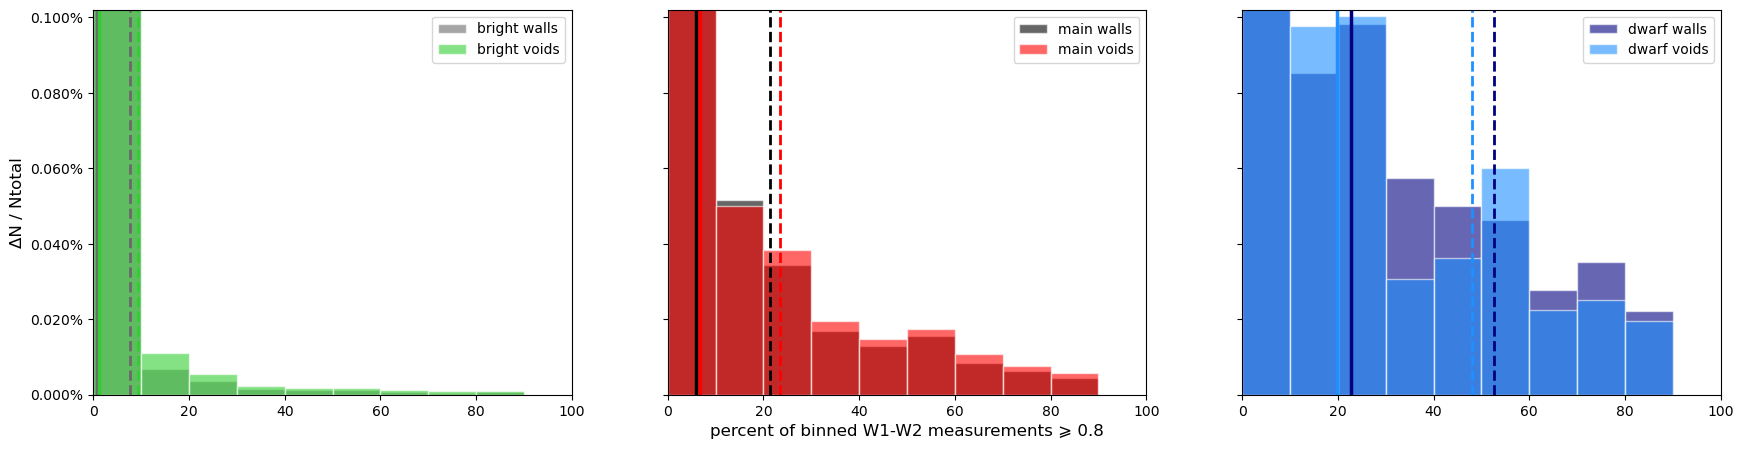

In [12]:
# COMBINED

fig, axs = plt.subplots(1, 3, figsize = (21, 5), sharey = True)

axs[0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 3))
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 3))
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 3))

# filled bars

num_bins = 10

void_a = 0.60
wall_a = 0.60

axs[0].hist(walls_bright_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "dimgray",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'bright walls',
        alpha = wall_a,
        weights = np.ones_like(walls_bright_pAGN['percentAGN']) / len(walls_bright_pAGN['percentAGN'])
       ) 

axs[0].hist(voids_bright_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "limegreen",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'bright voids',
        alpha = void_a,
        weights = np.ones_like(voids_bright_pAGN['percentAGN']) / len(voids_bright_pAGN['percentAGN'])
       ) 

axs[0].set_ylabel('ΔN / Ntotal', size = 'large')
# axs[1].set_xlabel('percent of binned W1-W2 measurements ⩾ 0.8', size = 'large')
axs[0].legend(loc = 'best')

# ------------------------------------

axs[1].hist(walls_main_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "black",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'main walls',
        alpha = wall_a,
        weights = np.ones_like(walls_main_pAGN['percentAGN']) / len(walls_main_pAGN['percentAGN'])
       )


axs[1].hist(voids_main_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "red",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'main voids',
        alpha = void_a,
        weights = np.ones_like(voids_main_pAGN['percentAGN']) / len(voids_main_pAGN['percentAGN'])
       ) 

# axs[0].set_ylabel('ΔN / Ntotal', size = 'large')
axs[1].set_xlabel('percent of binned W1-W2 measurements ⩾ 0.8', size = 'large')
axs[1].legend(loc = 'best')
axs[1].set_xlim(0, 100)

# ---------------------------------

axs[2].hist(walls_dwarf_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "navy",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'dwarf walls',
        alpha = wall_a,
        weights = np.ones_like(walls_dwarf_pAGN['percentAGN']) / len(walls_dwarf_pAGN['percentAGN'])
       ) 

axs[2].hist(voids_dwarf_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "dodgerblue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'dwarf voids',
        alpha = void_a,
        weights = np.ones_like(voids_dwarf_pAGN['percentAGN']) / len(voids_dwarf_pAGN['percentAGN'])
       ) 

# axs[0].set_ylabel('ΔN / Ntotal', size = 'large')
# axs[0].set_xlabel('percent of binned W1-W2 measurements ⩾ 0.8', size = 'large')
axs[2].legend(loc = 'best')
axs[2].set_xlim(0, 100)

# ---------------------------------

axs[0].axvline(x = walls_bright_pAGN['percentAGN'].mean(), 
              color = 'dimgrey', 
              linewidth = 2.5, 
              label = 'mean void')
axs[0].axvline(x = walls_bright_pAGN['percentAGN'].mean() + np.std(walls_bright_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[0].axvline(x = walls_bright_pAGN['percentAGN'].mean() - np.std(walls_bright_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2)

axs[0].axvline(x = voids_bright_pAGN['percentAGN'].mean(), 
              color = 'limegreen', 
              linewidth = 2.5, 
              label = 'mean void')
axs[0].axvline(x = voids_bright_pAGN['percentAGN'].mean() + np.std(voids_bright_pAGN['percentAGN']), 
              color = 'limegreen', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[0].axvline(x = voids_bright_pAGN['percentAGN'].mean() - np.std(voids_bright_pAGN['percentAGN']), 
              color = 'limegreen', 
              linestyle = 'dashed',
              linewidth = 2)

# ----------------------------

axs[1].axvline(x = walls_main_pAGN['percentAGN'].mean(), 
              color = 'black', 
              linewidth = 2.5, 
              label = 'mean void')
axs[1].axvline(x = walls_main_pAGN['percentAGN'].mean() + np.std(walls_main_pAGN['percentAGN']), 
              color = 'black', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[1].axvline(x = walls_main_pAGN['percentAGN'].mean() - np.std(walls_main_pAGN['percentAGN']), 
              color = 'black', 
              linestyle = 'dashed',
              linewidth = 2)

axs[1].axvline(x = voids_main_pAGN['percentAGN'].mean(), 
              color = 'red', 
              linewidth = 2.5, 
              label = 'mean void')
axs[1].axvline(x = voids_main_pAGN['percentAGN'].mean() + np.std(voids_main_pAGN['percentAGN']), 
              color = 'red', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[1].axvline(x = voids_main_pAGN['percentAGN'].mean() - np.std(voids_main_pAGN['percentAGN']), 
              color = 'red', 
              linestyle = 'dashed',
              linewidth = 2)

# ----------------------------

axs[2].axvline(x = walls_dwarf_pAGN['percentAGN'].mean(), 
              color = 'navy', 
              linewidth = 2.5, 
              label = 'mean void')
axs[2].axvline(x = walls_dwarf_pAGN['percentAGN'].mean() + np.std(walls_dwarf_pAGN['percentAGN']), 
              color = 'navy', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[2].axvline(x = walls_dwarf_pAGN['percentAGN'].mean() - np.std(walls_dwarf_pAGN['percentAGN']), 
              color = 'navy', 
              linestyle = 'dashed',
              linewidth = 2)

axs[2].axvline(x = voids_dwarf_pAGN['percentAGN'].mean(), 
              color = 'dodgerblue', 
              linewidth = 2.5, 
              label = 'mean void')
axs[2].axvline(x = voids_dwarf_pAGN['percentAGN'].mean() + np.std(voids_dwarf_pAGN['percentAGN']), 
              color = 'dodgerblue', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[2].axvline(x = voids_dwarf_pAGN['percentAGN'].mean() - np.std(voids_dwarf_pAGN['percentAGN']), 
              color = 'dodgerblue', 
              linestyle = 'dashed',
              linewidth = 2)

# axs[1].text(60, 0.02, 'Zoomed In', ha = 'center', va = 'center', size = 'x-large')

axs[0].set_xlim(0, 100)
axs[1].set_xlim(0, 100)
axs[2].set_xlim(0, 100)

axs[1].set_ylim(0, 0.102)

fig.savefig('Figures/iPoster_pAGN-distByMr_' + timestamp() + '.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [13]:
print("Count (%) of all void galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(voids_parent_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(voids_parent_pAGN, 'percentAGN', '<', 10.0, True))

print()

print("Count (%) of all wall galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(walls_parent_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(walls_parent_pAGN, 'percentAGN', '<', 10.0, True))

print()
print()

print("Count (%) of bright void galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(voids_bright_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(voids_bright_pAGN, 'percentAGN', '<', 10.0, True))

print()

print("Count (%) of bright wall galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(walls_bright_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(walls_bright_pAGN, 'percentAGN', '<', 10.0, True))

print()
print()

print("Count (%) of main void galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(voids_main_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(voids_main_pAGN, 'percentAGN', '<', 10.0, True))

print()

print("Count (%) of main wall galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(walls_main_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(walls_main_pAGN, 'percentAGN', '<', 10.0, True))

print()
print()

print("Count (%) of dwarf void galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(voids_dwarf_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(voids_dwarf_pAGN, 'percentAGN', '<', 10.0, True))

print()

print("Count (%) of dwarf wall galaxies that spend < 10% of their time as mid-IR AGN")

print(get_count(walls_dwarf_pAGN, 'percentAGN', '<', 10.0) + 
      get_percent(walls_dwarf_pAGN, 'percentAGN', '<', 10.0, True))

Count (%) of all void galaxies that spend < 10% of their time as mid-IR AGN
63259 (88.77 ± 0.48)

Count (%) of all wall galaxies that spend < 10% of their time as mid-IR AGN
201174 (91.75 ± 0.28)


Count (%) of bright void galaxies that spend < 10% of their time as mid-IR AGN
30004 (97.11 ± 0.79)

Count (%) of bright wall galaxies that spend < 10% of their time as mid-IR AGN
116964 (98.11 ± 0.4)


Count (%) of main void galaxies that spend < 10% of their time as mid-IR AGN
32854 (82.87 ± 0.62)

Count (%) of main wall galaxies that spend < 10% of their time as mid-IR AGN
83932 (84.35 ± 0.4)


Count (%) of dwarf void galaxies that spend < 10% of their time as mid-IR AGN
401 (55.93 ± 3.49)

Count (%) of dwarf wall galaxies that spend < 10% of their time as mid-IR AGN
278 (51.58 ± 3.81)


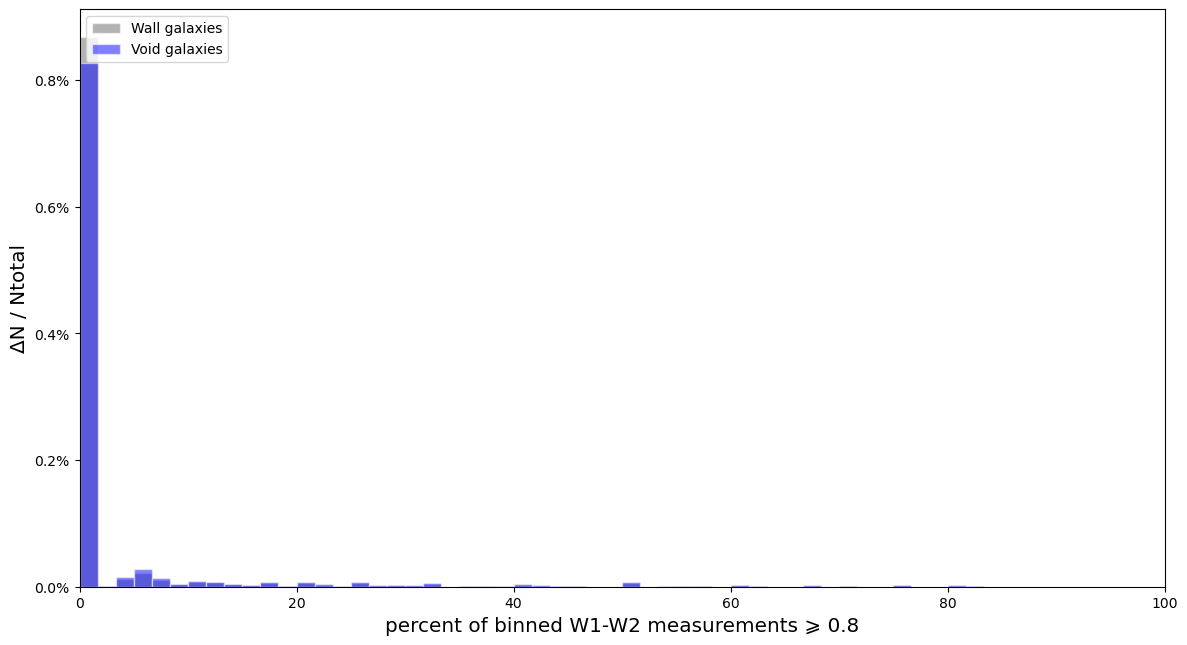

In [14]:
# plot distribution curve of Pearson coefficients of each object

fig, ax = plt.subplots(figsize = (14, 7.5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# filled bars

ax.hist(walls_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = 60, endpoint = False),
        color = "dimgray",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 0.5,
        weights = np.ones_like(walls_pAGN['percentAGN']) / len(walls_pAGN['percentAGN'])
       ) 

ax.hist(voids_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = 60, endpoint = False),
        color = "blue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.5,
        weights = np.ones_like(voids_pAGN['percentAGN']) / len(voids_pAGN['percentAGN'])
       ) 

# ax.axvline(x = 0.75, 
#           color = 'black',
#           linestyle = "solid",
#           linewidth = 2)

# ax.axvline(x = 0.85, 
#           color = 'red',
#               linestyle = "dashed",
#               linewidth = 2)


ax.set_ylabel('ΔN / Ntotal', size = 'x-large')
ax.set_xlabel('percent of binned W1-W2 measurements ⩾ 0.8', size = 'x-large')
ax.legend(loc = 'upper left')
ax.set_xlim(0, 100)

# ax.xaxis.set_ticks(np.arange(start = 0, stop = 100.1, step = 0.20))
plt.rcParams.update({'font.size': 16})


# fig.savefig('Figures/iPoster_pAGN-dist_' + timestamp() + '.png', dpi = 600, bbox_inches = 'tight')
plt.show()

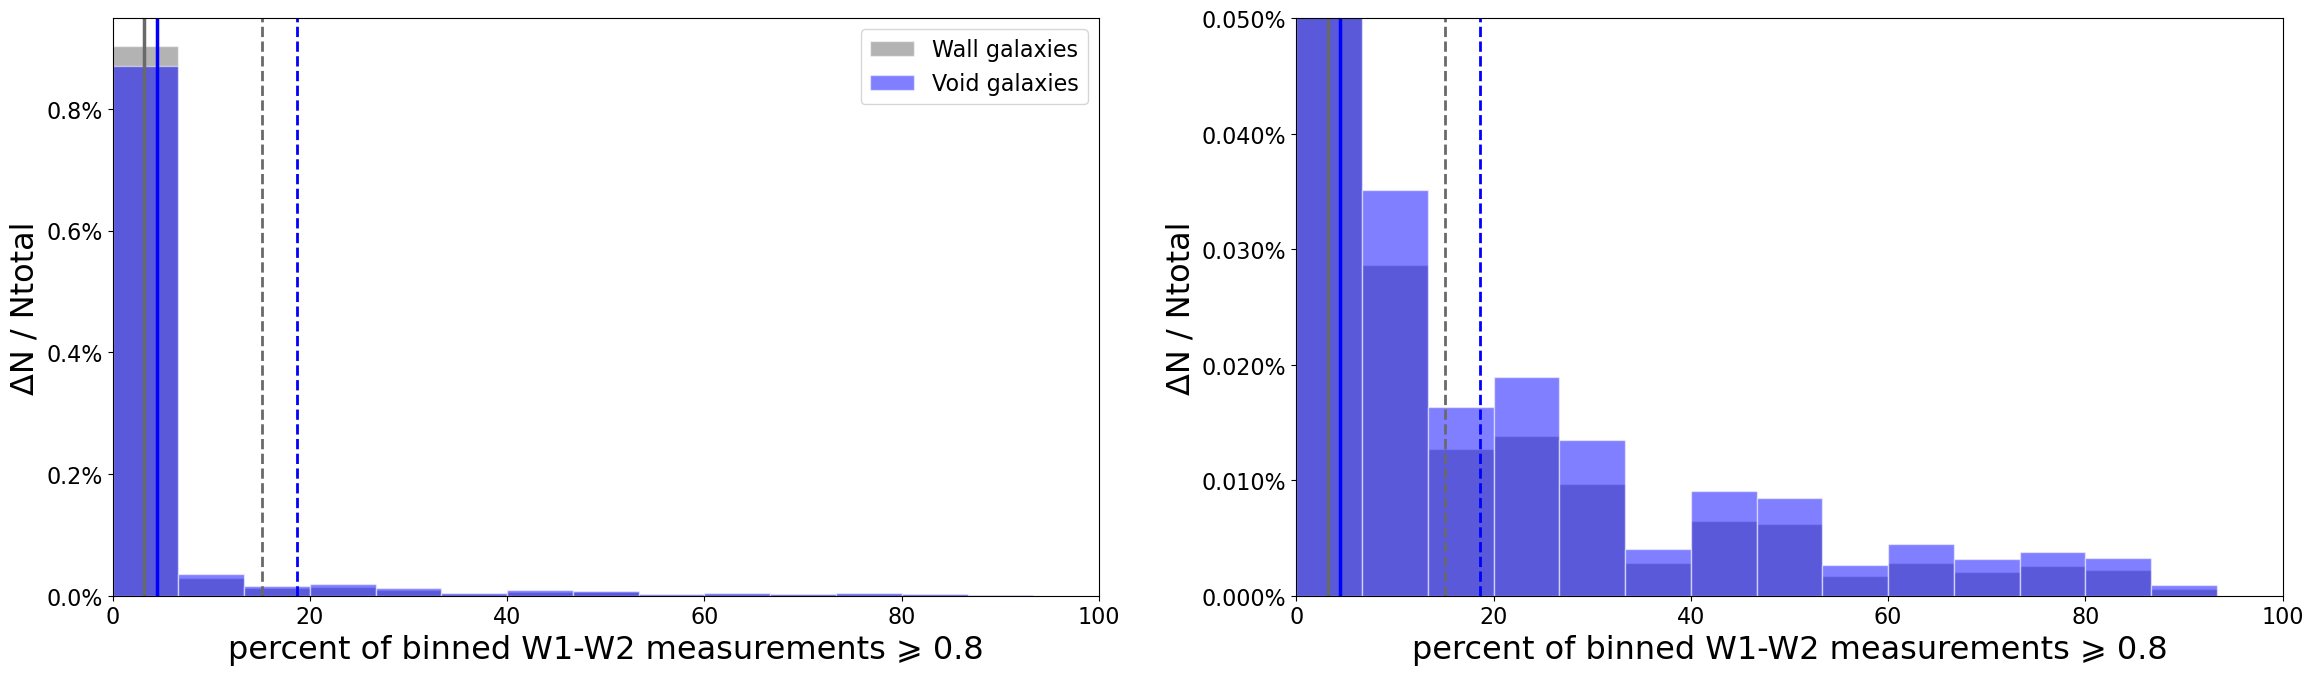

In [15]:
# COMBINED

fig, axs = plt.subplots(1, 2, figsize = (28, 7.5))

axs[1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 3))

# filled bars

num_bins = 15

axs[1].hist(walls_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "dimgray",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 0.5,
        weights = np.ones_like(walls_pAGN['percentAGN']) / len(walls_pAGN['percentAGN'])
       ) 

axs[1].hist(voids_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "blue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.5,
        weights = np.ones_like(voids_pAGN['percentAGN']) / len(voids_pAGN['percentAGN'])
       ) 


axs[1].set_ylabel('ΔN / Ntotal', size = 'x-large')
axs[1].set_xlabel('percent of binned W1-W2 measurements ⩾ 0.8', size = 'x-large')
# axs[1].legend(loc = 'best')

axs[0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

# ------------------------------------

axs[0].hist(walls_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "dimgray",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Wall galaxies',
        alpha = 0.5,
        weights = np.ones_like(walls_pAGN['percentAGN']) / len(walls_pAGN['percentAGN'])
       ) 

axs[0].hist(voids_pAGN['percentAGN'],
        bins = np.linspace(0, 100, num = num_bins, endpoint = False),
        color = "blue",
        edgecolor = 'white',
        linewidth = 1, 
        label = 'Void galaxies',
        alpha = 0.5,
        weights = np.ones_like(voids_pAGN['percentAGN']) / len(voids_pAGN['percentAGN'])
       ) 

axs[0].set_ylabel('ΔN / Ntotal', size = 'x-large')
axs[0].set_xlabel('percent of binned W1-W2 measurements ⩾ 0.8', size = 'x-large')
axs[0].legend(loc = 'best')
axs[0].set_xlim(0, 100)

axs[0].axvline(x = walls_pAGN['percentAGN'].mean(), 
              color = 'dimgrey', 
              linewidth = 2.5, 
              label = 'mean void')
axs[0].axvline(x = walls_pAGN['percentAGN'].mean() + np.std(walls_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[0].axvline(x = walls_pAGN['percentAGN'].mean() - np.std(walls_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2)

axs[0].axvline(x = voids_pAGN['percentAGN'].mean(), 
              color = 'blue', 
              linewidth = 2.5, 
              label = 'mean void')
axs[0].axvline(x = voids_pAGN['percentAGN'].mean() + np.std(voids_pAGN['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[0].axvline(x = voids_pAGN['percentAGN'].mean() - np.std(voids_pAGN['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2)

# ----------------------------

axs[1].axvline(x = walls_pAGN['percentAGN'].mean(), 
              color = 'dimgrey', 
              linewidth = 2.5, 
              label = 'mean void')
axs[1].axvline(x = walls_pAGN['percentAGN'].mean() + np.std(walls_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[1].axvline(x = walls_pAGN['percentAGN'].mean() - np.std(walls_pAGN['percentAGN']), 
              color = 'dimgrey', 
              linestyle = 'dashed',
              linewidth = 2)

axs[1].axvline(x = voids_pAGN['percentAGN'].mean(), 
              color = 'blue', 
              linewidth = 2.5, 
              label = 'mean void')
axs[1].axvline(x = voids_pAGN['percentAGN'].mean() + np.std(voids_pAGN['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2, 
              label = 'mean void ± std')
axs[1].axvline(x = voids_pAGN['percentAGN'].mean() - np.std(voids_pAGN['percentAGN']), 
              color = 'blue', 
              linestyle = 'dashed',
              linewidth = 2)

# axs[1].text(60, 0.02, 'Zoomed In', ha = 'center', va = 'center', size = 'x-large')

axs[1].set_xlim(0, 100)
axs[1].set_ylim(0, 0.05)

# fig.savefig('Figures/iPoster_pAGN-dist_' + timestamp() + '.png', dpi = 600, bbox_inches = 'tight')
plt.show()